## 1. Problem Statement
* The problem statement is how the student's performance(test score) is affected by other variables such as gender, race/ethinicity, parental level of education, lunch and test preparation course. 

## 2. Data Collection and Import Required Packages 

In [113]:
# Basic Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Modelling!
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('exams.csv')
print("Data Shape is :",df.shape)
print("\nShow Top 10 Records")
df.head(10)

Data Shape is : (1000, 8)

Show Top 10 Records


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


## 3. Dataset Checking to perform
* Check Missing Value
* Check Duplicate
* Check Datatype
* Check the number of unique values of each column
* check statistics of data set
* check various categories present in the different categorical column

### 3.1 Checking Missing Values

In [73]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Result:** There are no missing values in the data set.

### 3.2 Checking Duplicates

In [74]:
df.duplicated().sum()

np.int64(0)

**Result:** There are no duplicates values in the data set

### 3.3 Checking Data Types

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [76]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

### 3.5 Print numerical and categorical columns

In [77]:
# Define numerical & categorical columns
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

# print columns
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))

We have 3 numerical columns(features) : ['math score', 'reading score', 'writing score']

We have 5 categorical columns(features) : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.6 Print the number of unique values of each categorical column

In [78]:
# print("Categories in 'gender' variable:     ",end=" " )
# print(df['gender'].unique())
for feature in df.columns :
    if df[feature].dtype == 'O':
        print('Categories in {} variable : {}'.format(feature,df[feature].unique()))

Categories in gender variable : ['female' 'male']
Categories in race/ethnicity variable : ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in parental level of education variable : ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in lunch variable : ['standard' 'free/reduced']
Categories in test preparation course variable : ['completed' 'none']


### 3.7 Checking statistics of data set

In [79]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


**Insight**
* From above description all means are very close to each other: Between 66 and 69.16
* All standard deviations are also close to each other: Between 14.60 and 15.19
* Minimum score for math is 0, Minimum score for reading is 17, Minimum score for writing is 10

### 3.8 Adding 'Total' and 'Average' Columns

In [80]:
df['total score']= df['math score'] + df['reading score'] + df['writing score']
df['avg score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


### 3.9 Counting the total number of students who obtained full marks and those who scored less than 25 marks in Mathematics, Reading, and Writing.

In [81]:
math_full_score = df[df['math score']==100]['math score'].count()
reading_full_score = df[df['reading score']==100]['reading score'].count()
writing_full_score =  df[df['writing score']==100]['writing score'].count()

print(f'Number of students with full marks in Maths: {math_full_score }')
print(f'Number of students with full marks in Reading: {reading_full_score}')
print(f'Number of students with full marks in Writing: {writing_full_score}')

Number of students with full marks in Maths: 9
Number of students with full marks in Reading: 10
Number of students with full marks in Writing: 13


In [82]:
math_less_25 = df[df['math score'] <= 25]['math score'].count()
reading_less_25 = df[df['reading score'] <= 25]['reading score'].count()
writing_less_25 = df[df['writing score'] <= 25]['writing score'].count()


print(f'Number of students with less than 25 marks in Maths: {math_less_25}')
print(f'Number of students with less than 25 marks in Reading: {reading_less_25}')
print(f'Number of students with less than 25 marks in Writing: {writing_less_25}')

Number of students with less than 25 marks in Maths: 6
Number of students with less than 25 marks in Reading: 1
Number of students with less than 25 marks in Writing: 3


**Insight**
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

## 4. Visualizing the Data

### 4.1 Gender wise Average Score, Math Score, Reading Score, Writing Score distribution

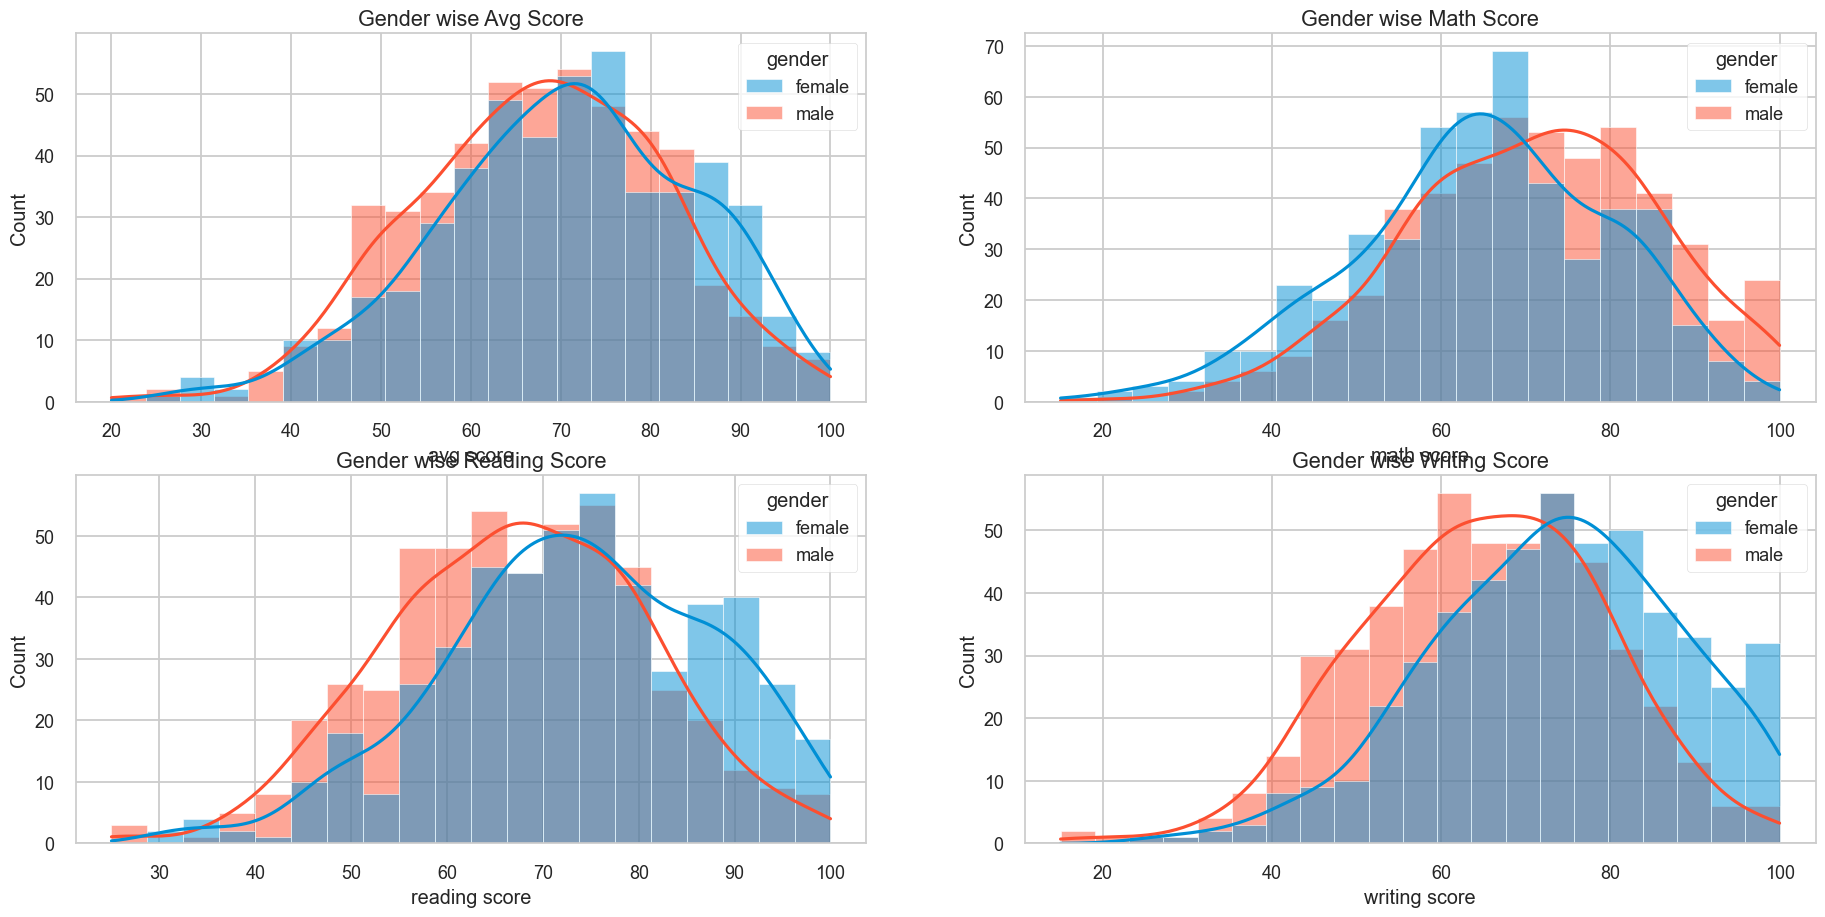

In [83]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.histplot(data=df,x='avg score',kde=True,hue='gender',ax=axs[0, 0])
axs[0, 0].set_title('Gender wise Avg Score')

sns.histplot(data=df,x='math score',kde=True,hue='gender',ax=axs[0, 1])
axs[0, 1].set_title('Gender wise Math Score')

sns.histplot(data=df,x='reading score',kde=True,hue='gender',ax=axs[1, 0])
axs[1, 0].set_title('Gender wise Reading Score')

sns.histplot(data=df,x='writing score',kde=True,hue='gender',ax=axs[1, 1])
axs[1, 1].set_title('Gender wise Writing Score')

plt.show()

**Insights**
* Female students tend to perform well then male students

### 4.2 Lunch Group wise Score Distribution

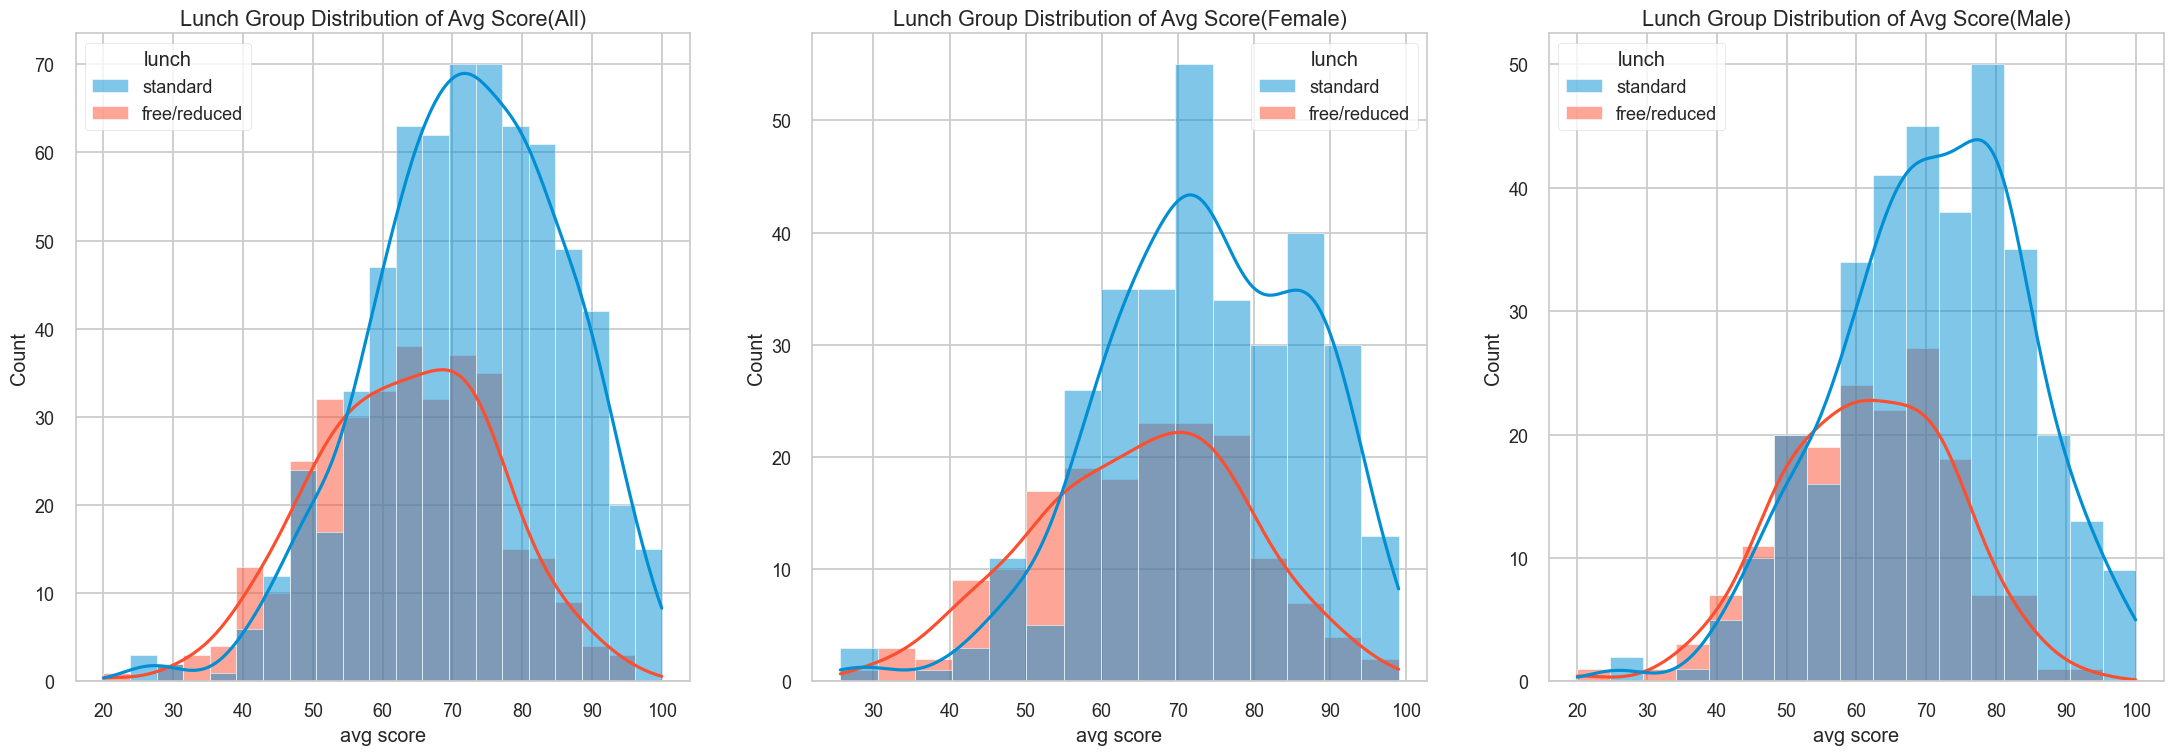

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('Lunch Group Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='lunch', ax=axs[0])

axs[1].set_title('Lunch Group Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='lunch', ax=axs[1])

axs[2].set_title('Lunch Group Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='lunch', ax=axs[2])

plt.show()

**Insights**
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

### 4.3 parental level of education wise Score Distribution

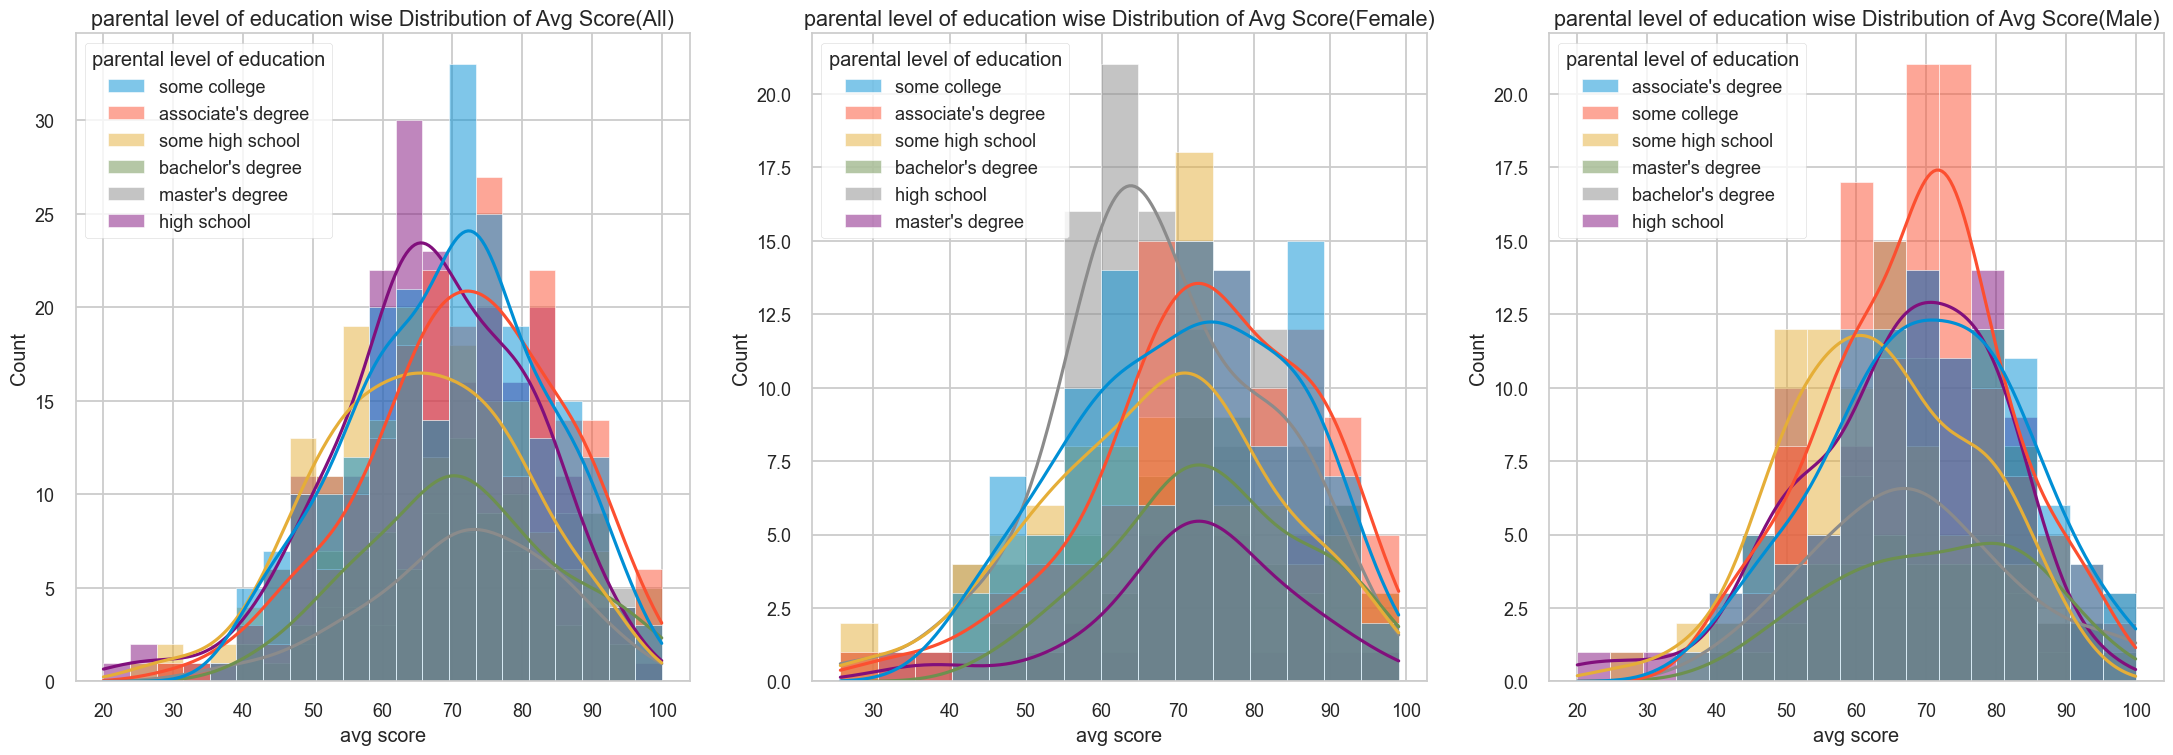

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('parental level of education wise Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='parental level of education', ax=axs[0])

axs[1].set_title('parental level of education wise Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='parental level of education', ax=axs[1])

axs[2].set_title('parental level of education wise Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='parental level of education', ax=axs[2])

plt.show()

**Insights**
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

### 4.4 race/ethnicity wise Score Distribution

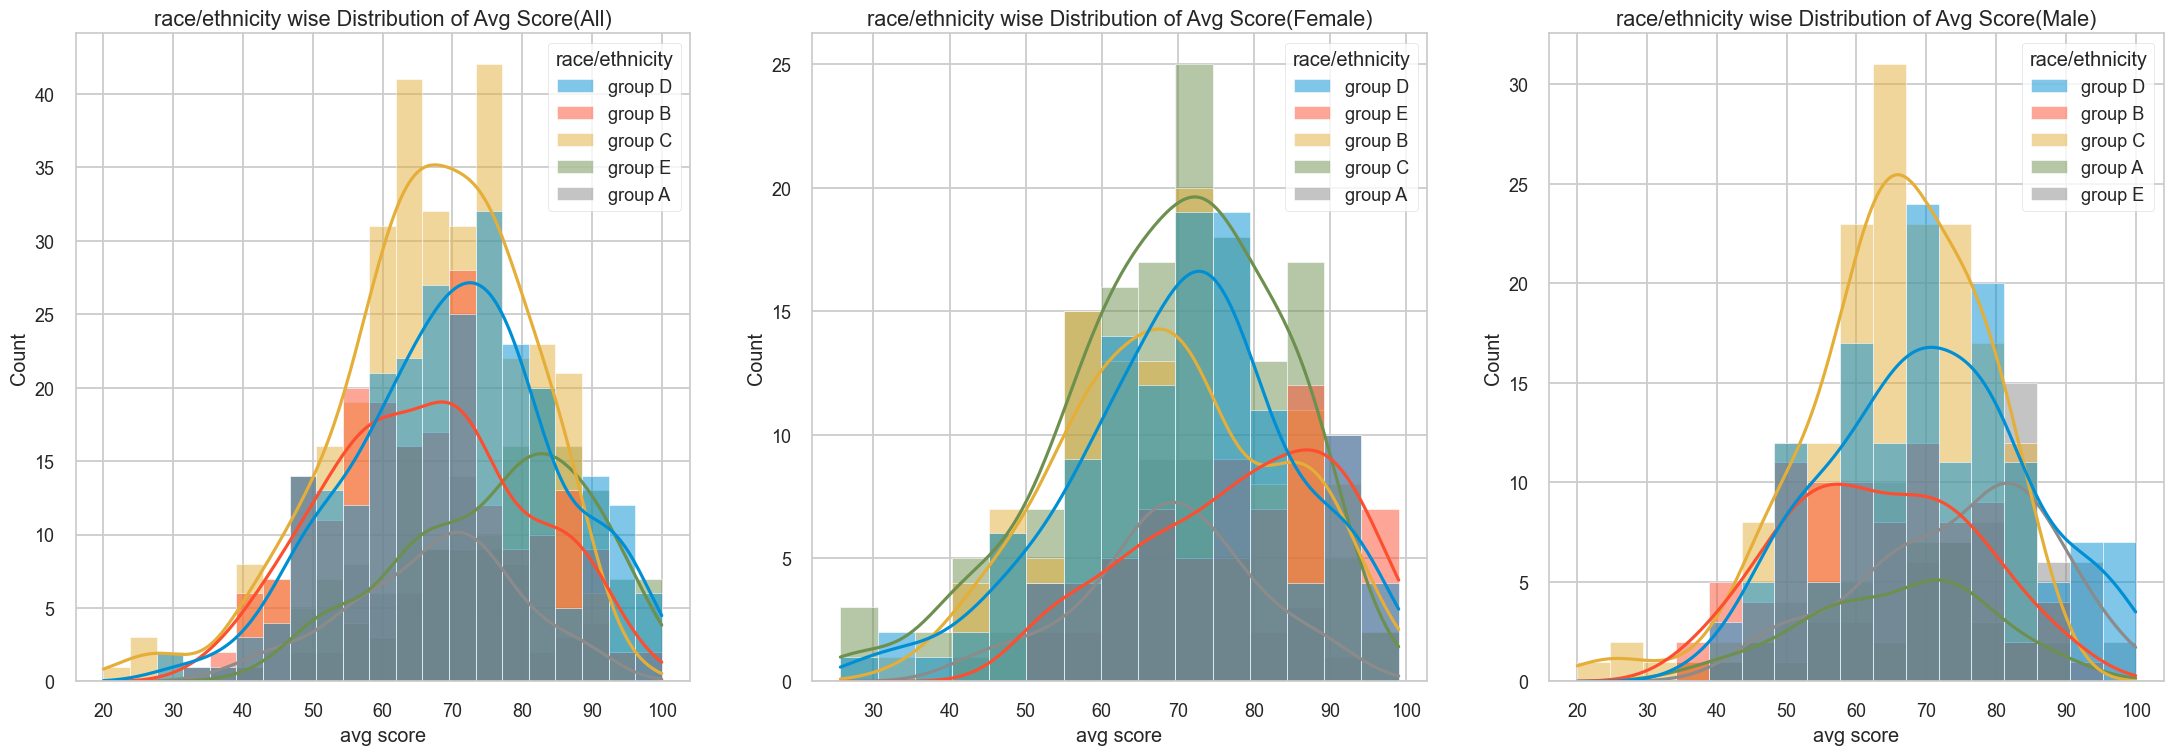

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('race/ethnicity wise Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='race/ethnicity', ax=axs[0])

axs[1].set_title('race/ethnicity wise Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='race/ethnicity', ax=axs[1])

axs[2].set_title('race/ethnicity wise Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='race/ethnicity', ax=axs[2])

plt.show()

**Insights**
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.5 score of students in all three subjects

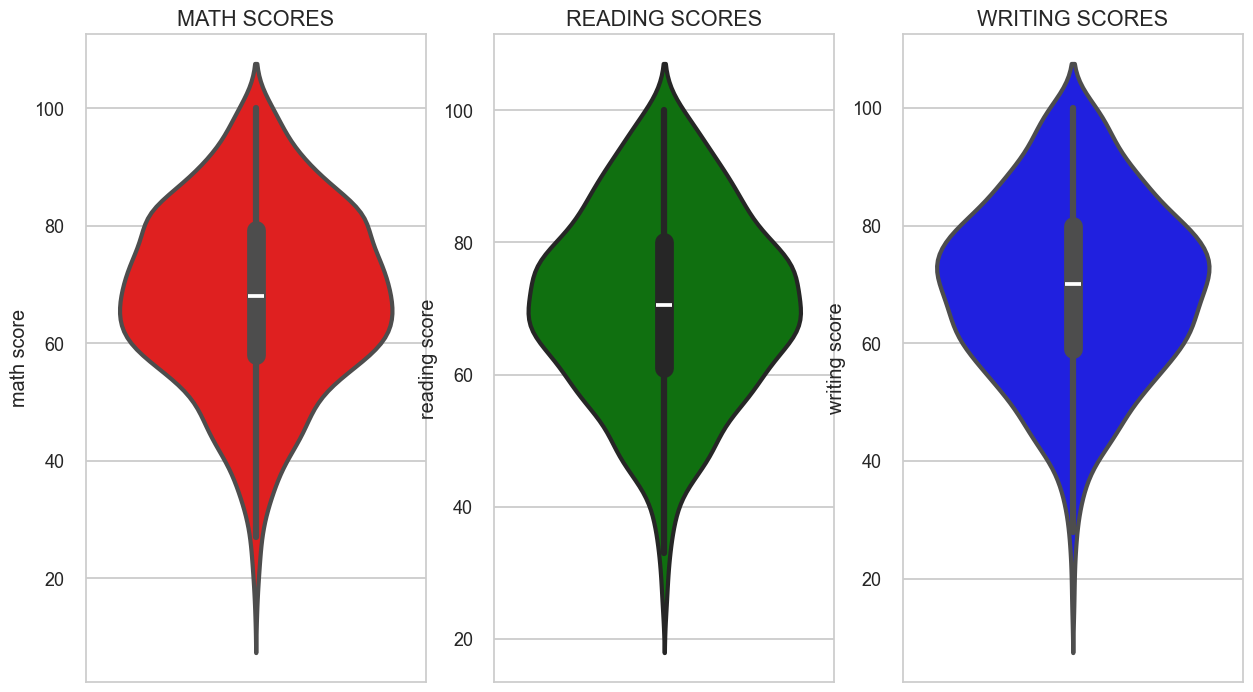

In [87]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

**Insights**
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.6 Multivariate analysis using pieplot

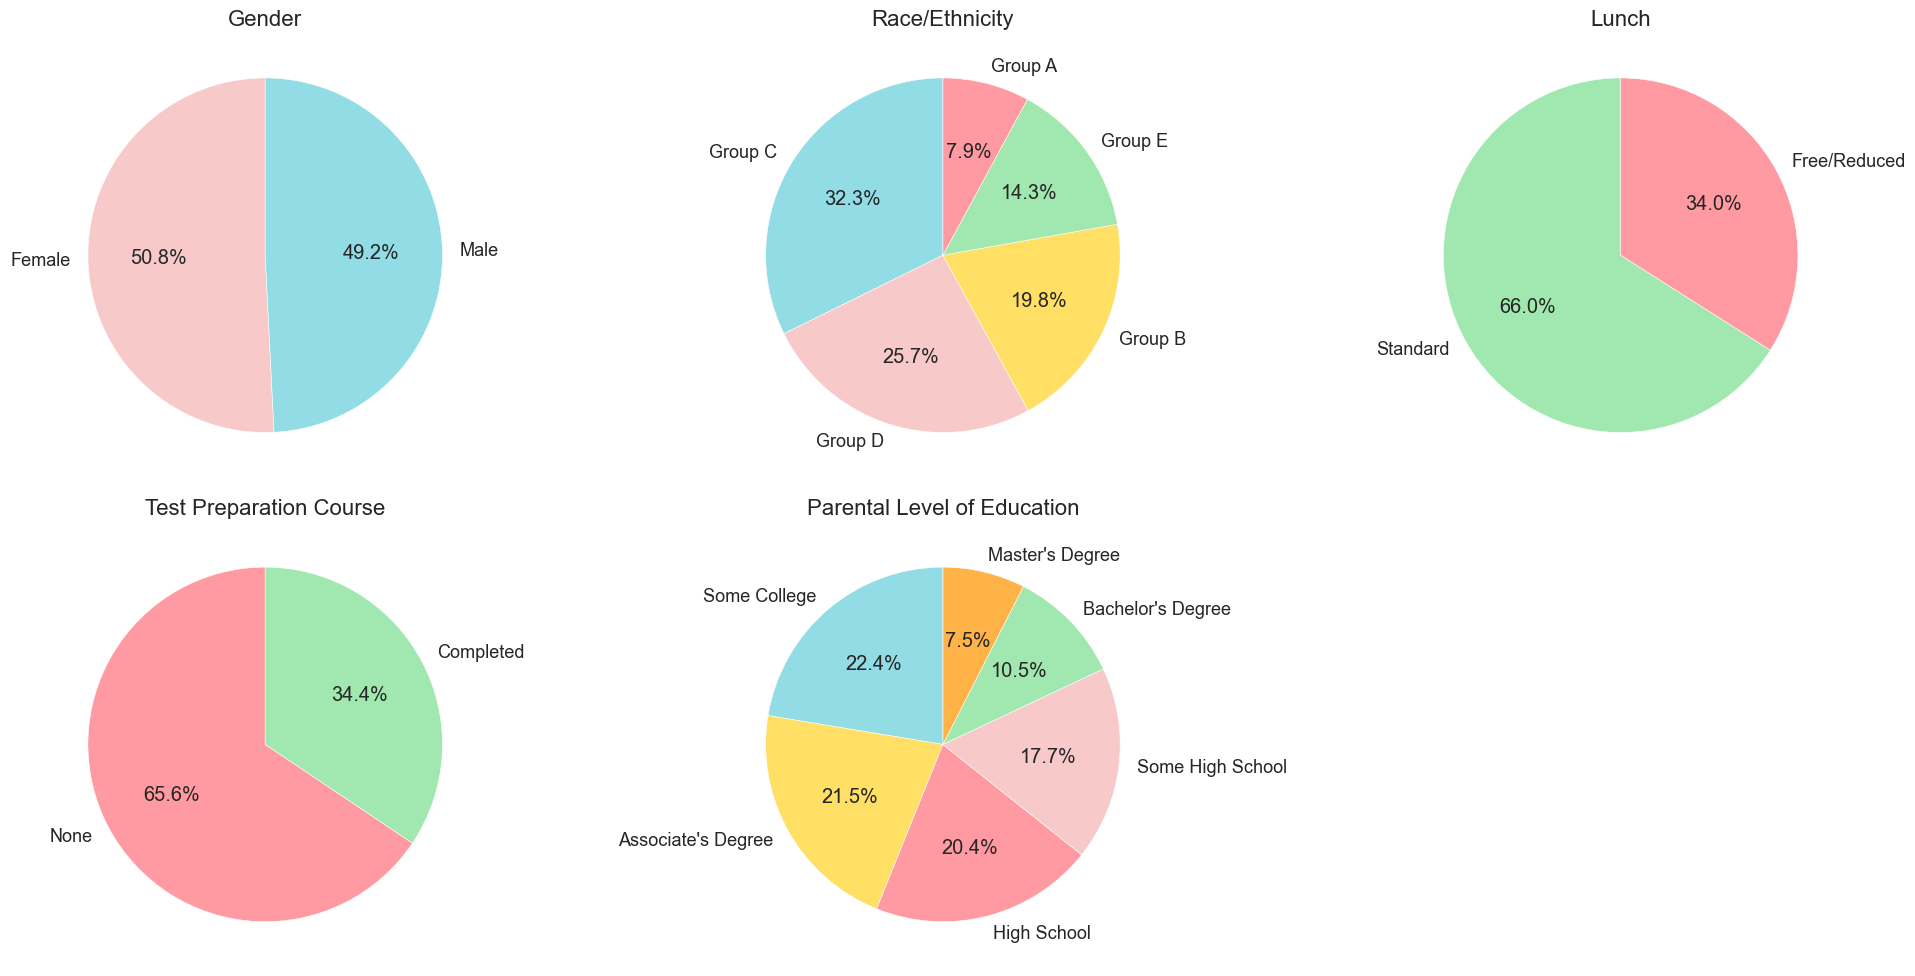

In [88]:
plt.figure(figsize=(20, 10))

# Gender
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#F7CAC9', '#92DCE5']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Gender',fontsize=16)

# Race/Ethnicity
plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['#92DCE5', '#F7CAC9', '#FFDF64', '#A0E8AF', '#FF9AA2']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Race/Ethnicity',fontsize=16)

# Lunch
plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']
colors = ['#A0E8AF', '#FF9AA2']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Lunch',fontsize=16)

# Test Preparation Course
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = ['None', 'Completed']
colors = ['#FF9AA2', '#A0E8AF']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Test Preparation Course',fontsize=16)

# Parental Level of Education
plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = ["Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"]
colors = ['#92DCE5', '#FFDF64', '#FF9AA2', '#F7CAC9', '#A0E8AF', '#FFB347']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Parental Level of Education',fontsize=16)

plt.tight_layout()
plt.show()


**Insights**
* Gender wise Number of Male and Female students is almost equal
* Race/Ethnicity wise Number students are greatest in Group C
* Lunch wise Number of students who have standard lunch are greater
* Test Preparation Course wise Number of students who have not enrolled in any test preparation course is greater
* Parental Level of Education wise Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.7 Feature wise Visualization

### 4.7.1 Gender Column
* How is distribution of Gender ?
* Is gender has any impact on student's performance?

#### How is distribution of Gender? **(Univariate Analysis)**

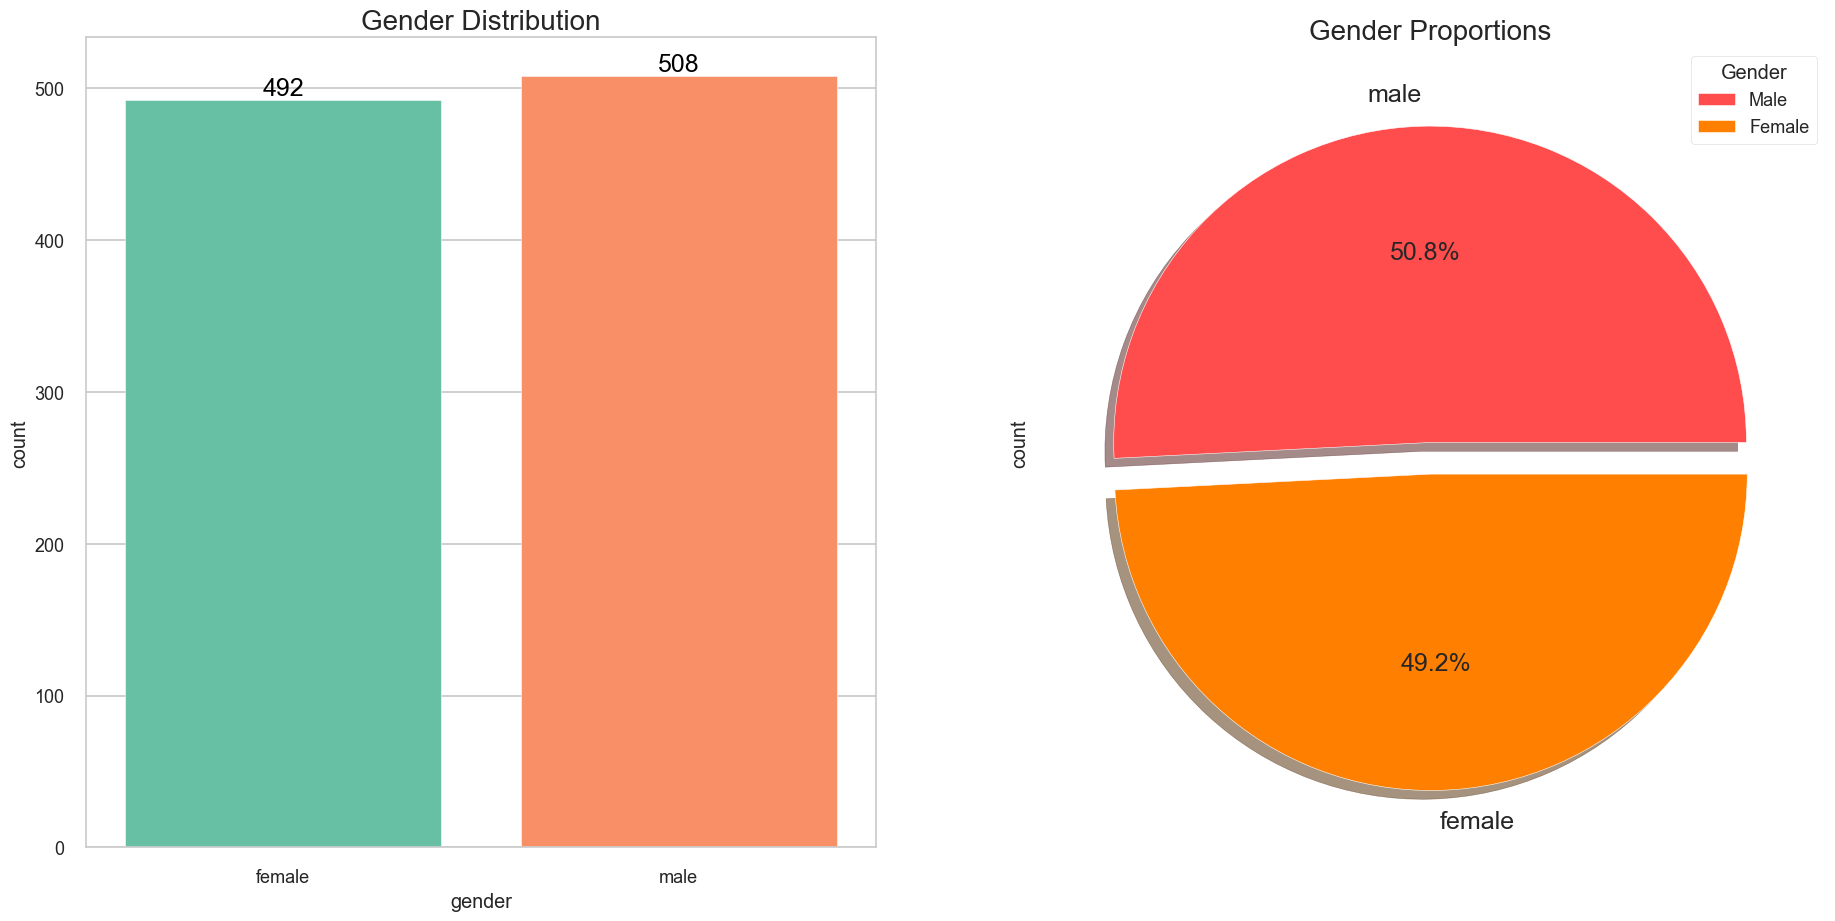

In [89]:
# set the color palette
colors = sns.color_palette('Set2')

# create the subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot the count plot
sns.countplot(x=df['gender'], data=df, palette=colors, ax=ax[0], saturation=0.95)

# add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=18)

# plot the pie chart
pie_colors = ['#ff4d4d', '#ff8000']
df['gender'].value_counts().plot(kind='pie', colors=pie_colors, explode=[0, 0.1],
                                 autopct='%1.1f%%', shadow=True, ax=ax[1], textprops={'fontsize': 18})
# set title and legend
ax[0].set_title('Gender Distribution', fontsize=20)
ax[1].set_title('Gender Proportions', fontsize=20)
ax[1].legend(title='Gender', loc='best', labels=['Male', 'Female'])

# show the plot
plt.show()


**Insights**
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### Is gender has any impact on student's performance? **(Bivariate Analysis)**

In [90]:
numeric_cols = df.select_dtypes(include=['number']).columns
gender_group = df.groupby('gender')[numeric_cols].mean()

gender_group

,math score,reading score,writing score,total score,avg score
gender,,,,,
female,64.77439,73.473577,73.439024,211.686992,70.562331
male,70.75000,67.387795,64.976378,203.114173,67.704724


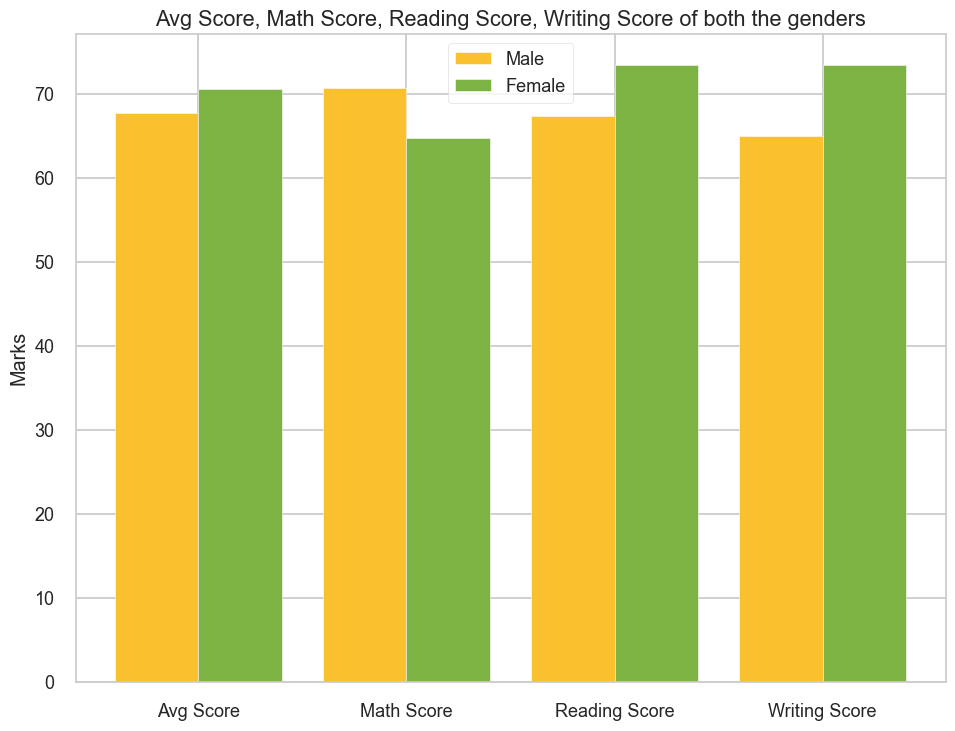

In [91]:
sns.set_palette('Set2')
plt.figure(figsize=(10, 8))

X = ['Avg Score', 'Math Score', 'Reading Score', 'Writing Score']
female_scores = [gender_group['avg score'][0], gender_group['math score'][0], gender_group['reading score'][0], gender_group['writing score'][0]]
male_scores = [gender_group['avg score'][1], gender_group['math score'][1], gender_group['reading score'][1], gender_group['writing score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='#FBC02D')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='#7CB342')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Avg Score, Math Score, Reading Score, Writing Score of both the genders")
plt.legend()
plt.show()

**Insights**
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

### 4.7.2 Race/Ethnicity Column
* How is Group wise distribution ?
* Is race/ethnicity has any impact on student's performance?

#### How is Group wise distribution? **(Univariate Analysis)**

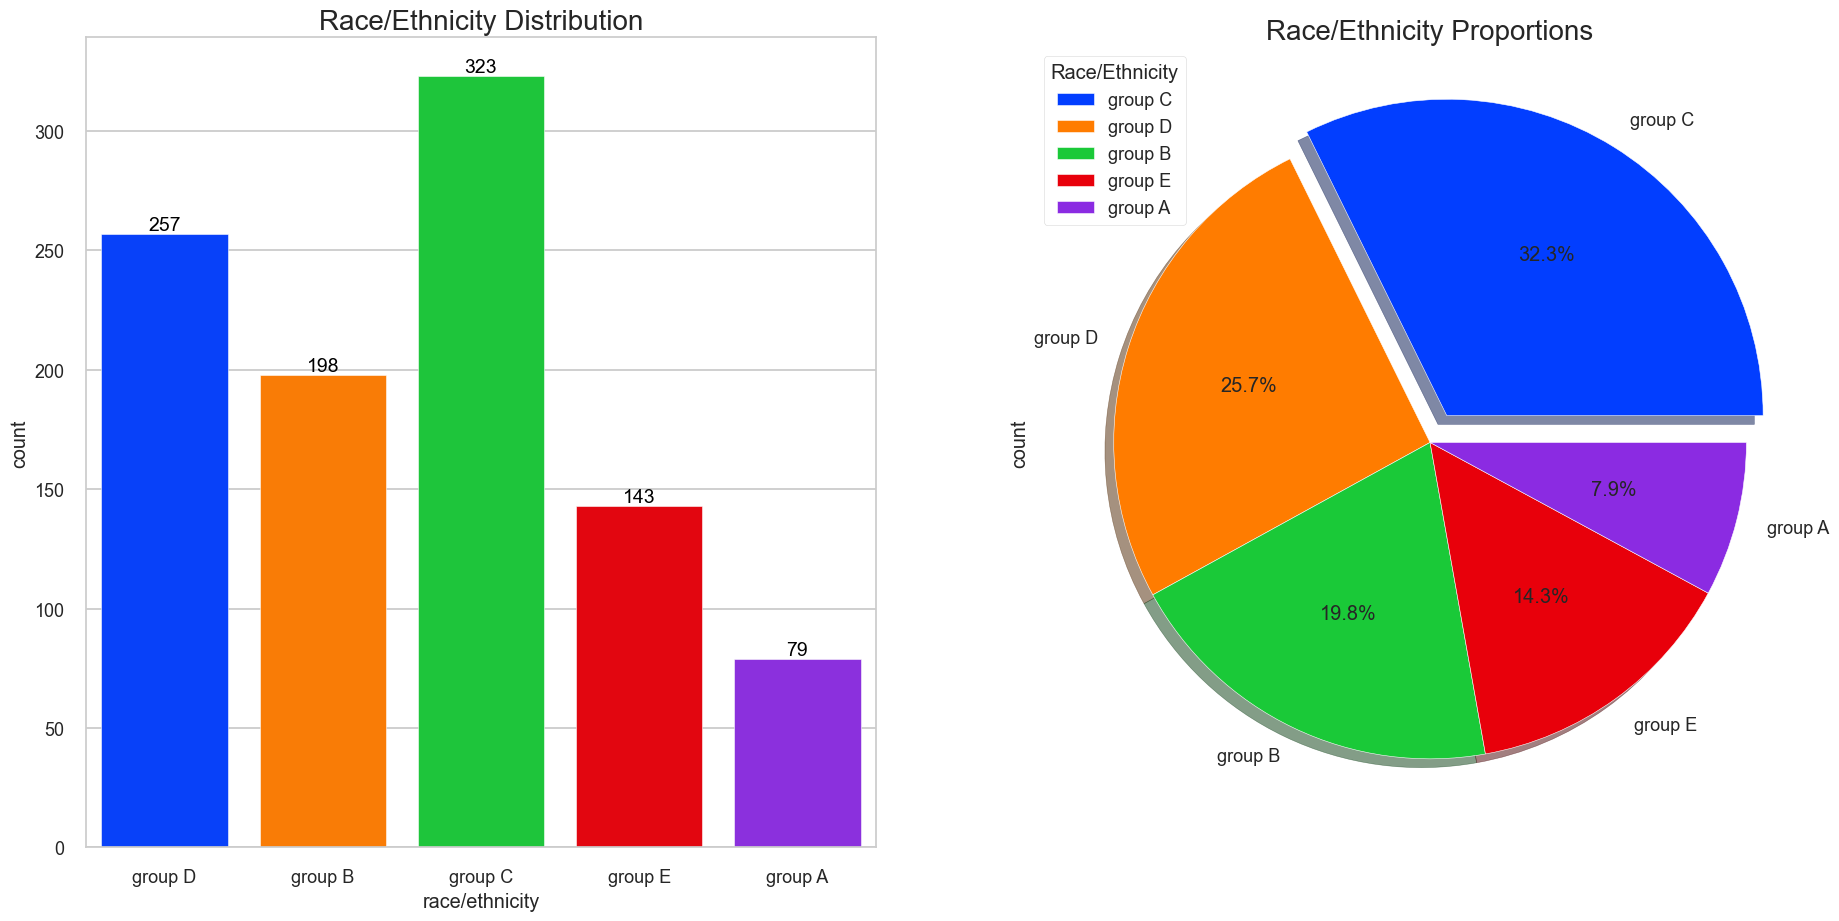

In [92]:
# set the color palette
colors = sns.color_palette('bright')

# create the subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot the count plot
sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)

# add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14)

# plot the pie chart
explode = [0.1, 0, 0, 0, 0]
df['race/ethnicity'].value_counts().plot(kind='pie', colors=colors, explode=explode,
                                         autopct='%1.1f%%', shadow=True, ax=ax[1])
# set title and legend
ax[0].set_title('Race/Ethnicity Distribution', fontsize=20)
ax[1].set_title('Race/Ethnicity Proportions', fontsize=20)
ax[1].legend(title='Race/Ethnicity', loc='best', labels=df['race/ethnicity'].value_counts().index)

# show the plot
plt.show()

**Insights**
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

#### Is race/ethnicity has any impact on student's performance? **(Bivariate Analysis)**

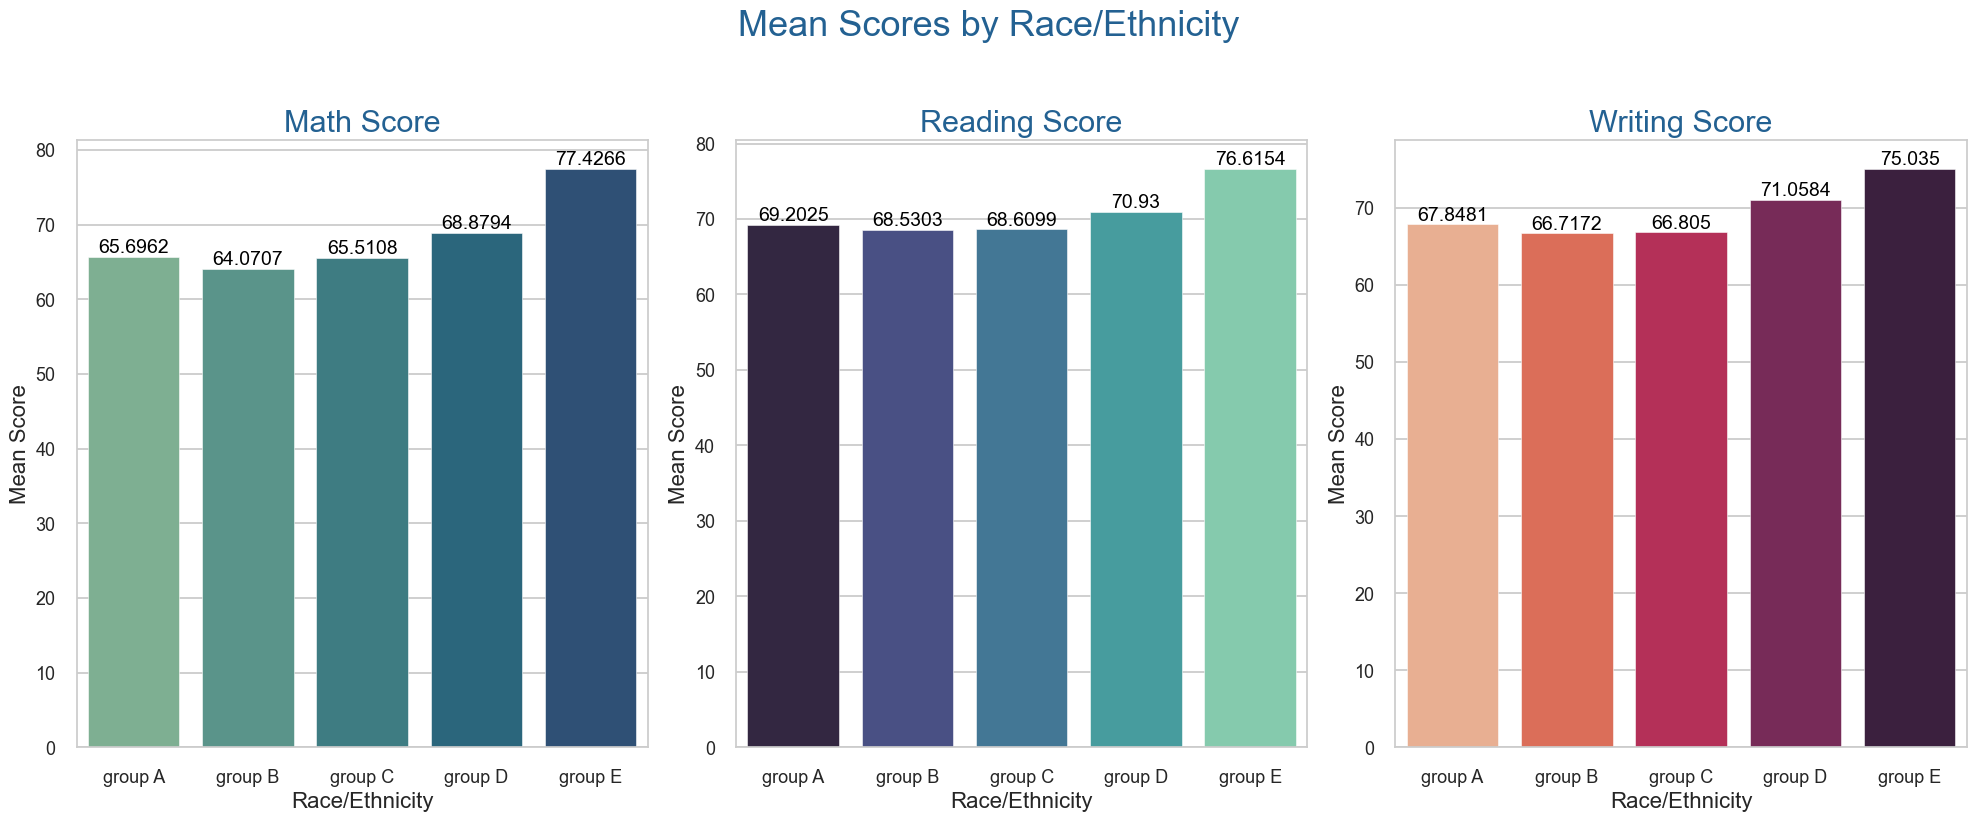

In [93]:
Group_data2 = df.groupby('race/ethnicity')

# create the subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# plot the math scores
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='crest', ax=ax[0])
ax[0].set_title('Math Score', color='#236192', size=22)
ax[0].set_xlabel('Race/Ethnicity', fontsize=16)
ax[0].set_ylabel('Mean Score', fontsize=16)

# add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14)

# plot the reading scores
sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading Score', color='#236192', size=22)
ax[1].set_xlabel('Race/Ethnicity', fontsize=16)
ax[1].set_ylabel('Mean Score', fontsize=16)

# add labels to the bars
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', fontsize=14)

# plot the writing scores
sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, palette='rocket_r', ax=ax[2])
ax[2].set_title('Writing Score', color='#236192', size=22)
ax[2].set_xlabel('Race/Ethnicity', fontsize=16)
ax[2].set_ylabel('Mean Score', fontsize=16)

# add labels to the bars
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', fontsize=14)

plt.suptitle('Mean Scores by Race/Ethnicity', fontsize=26, color='#236192', y=1.03)
plt.tight_layout()
plt.show()


**Insights**
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.

### 4.7.3 Parental Level Of Education Column
* What is the best educational background of the student's parents?
* Is parental education has any impact on student's performance?

#### What is the best educational background of the student's parents? **(Univariate Analysis)**

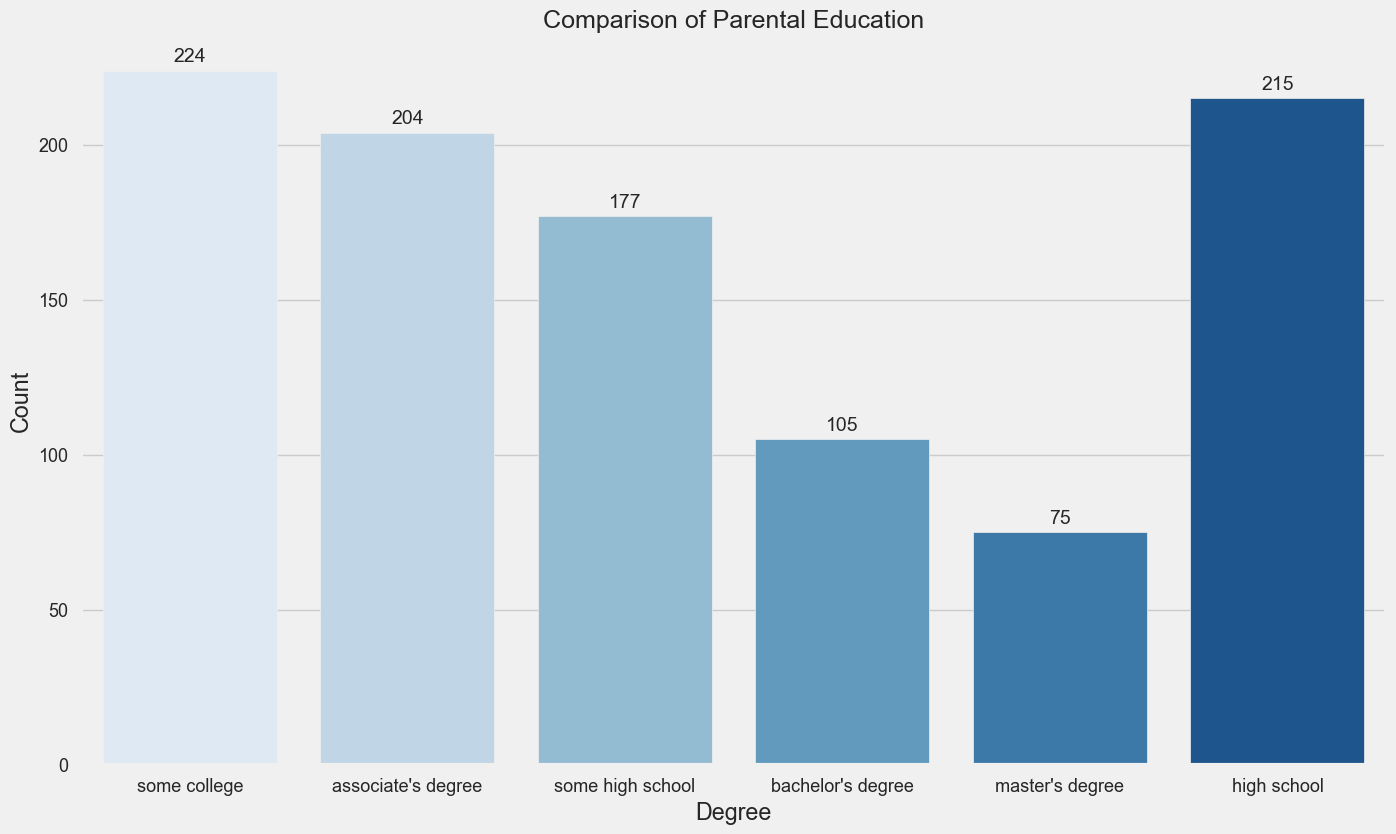

In [94]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='parental level of education', data=df, palette='Blues')
plt.title('Comparison of Parental Education', fontsize=18)
ax.set(xlabel='Degree', ylabel='Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()


**Insights**
* Largest number of parents are from some college.

#### Is parental education has any impact on student's performance? **(Bivariate Analysis)**

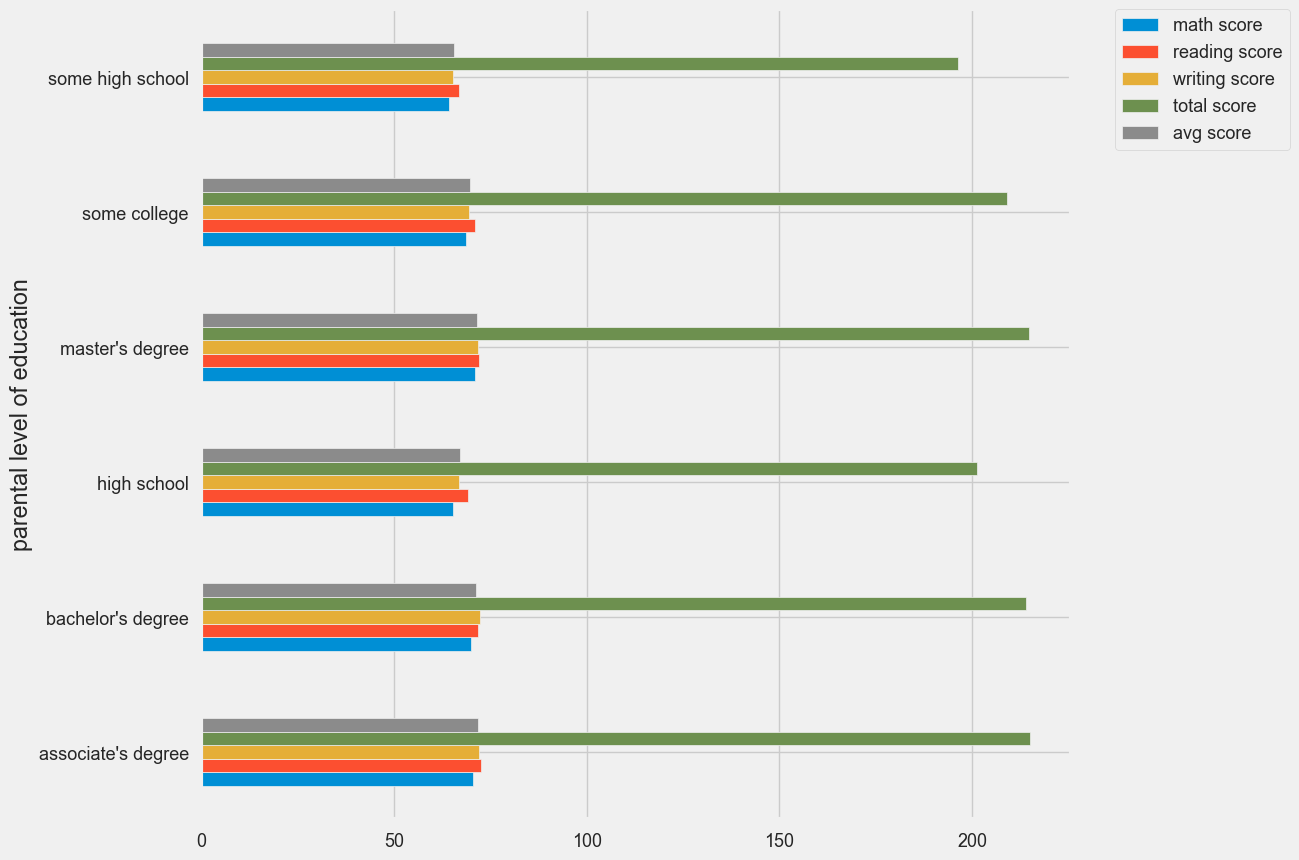

In [95]:
# Specify only numeric columns for the mean calculation
# First, get only numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=['number']).columns

# Then use these columns in the groupby aggregation
df.groupby('parental level of education')[numeric_cols].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
* Total score of student whose parents possess master and bachelor level education are higher than others.

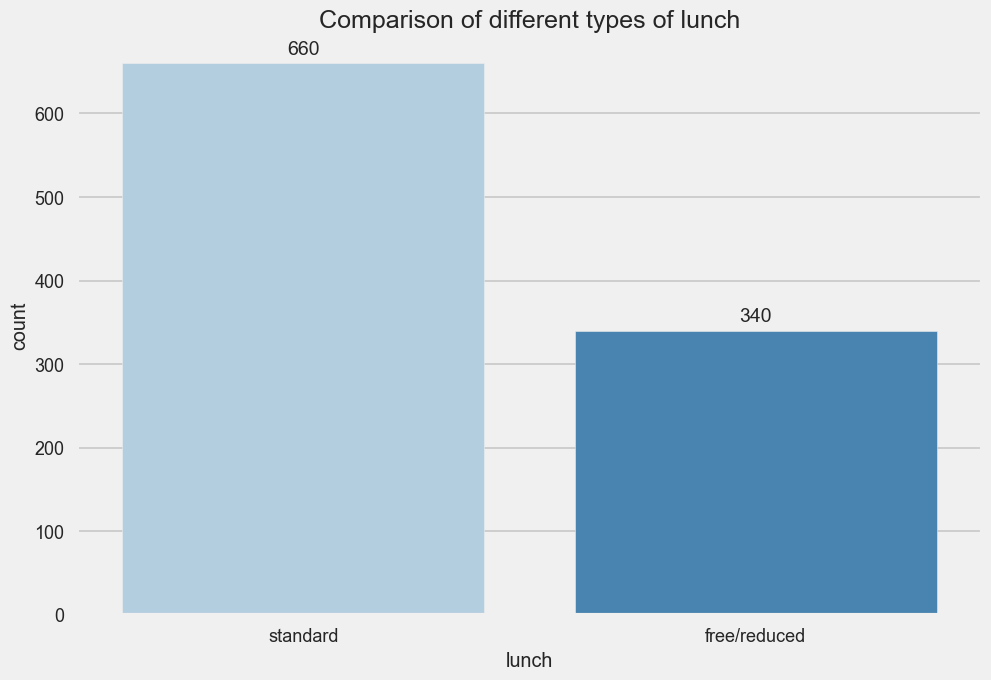

In [96]:
plt.rcParams['figure.figsize'] = (15, 9)
# Use a valid style that's available in newer versions
# 'seaborn-v0_8-talk' is the updated name, or you can use another style like 'seaborn'
try:
    plt.style.use('seaborn-v0_8-talk')  # For newer matplotlib versions
except:
    plt.style.use('seaborn')  # Fallback to default seaborn style

ax = sns.countplot(x='lunch', data=df, palette='Blues')
plt.title('Comparison of different types of lunch', fontsize=18)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

### 4.8 Multivariate Analysis Using Pairplot

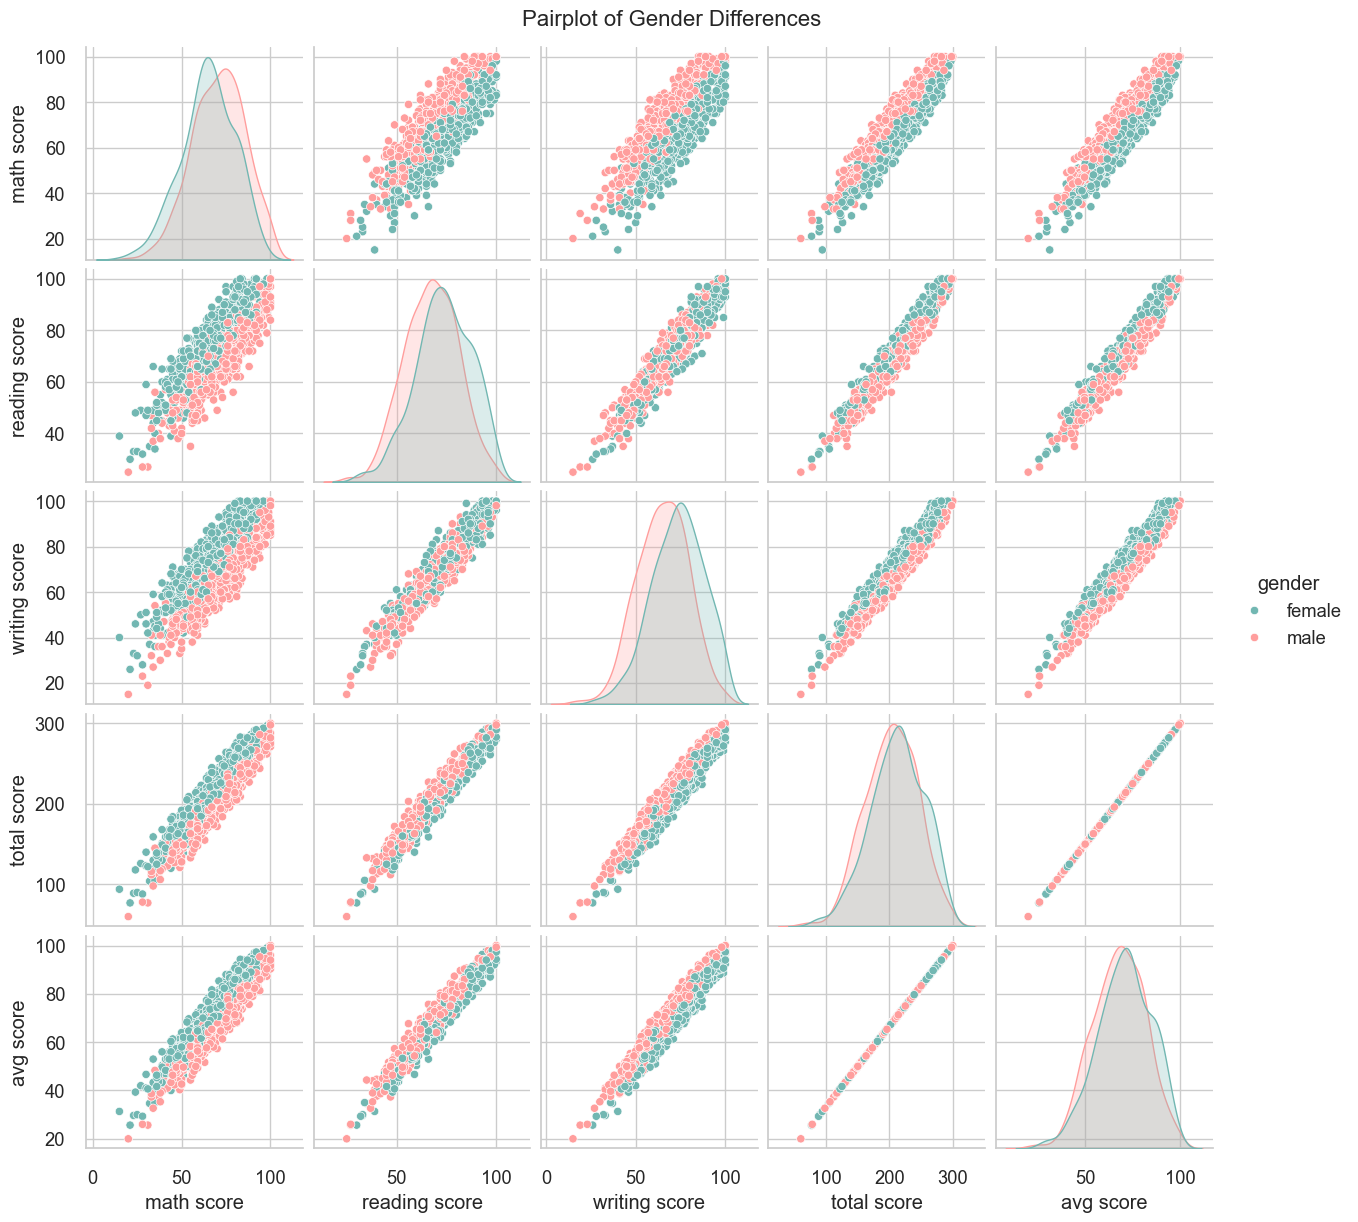

In [97]:
# Use a modern color palette
colors = ["#72b7b2", "#ff9e9d"]

# Set style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create pairplot with hue and custom color palette
sns.pairplot(df, hue="gender", palette=colors)

# Add some visual enhancements
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairplot of Gender Differences", fontsize=16)

# Show the plot
plt.show()


**Insights**
* From the above plot it is clear that all the scores increase linearly with each other.

### 4.9 Checking Outliers

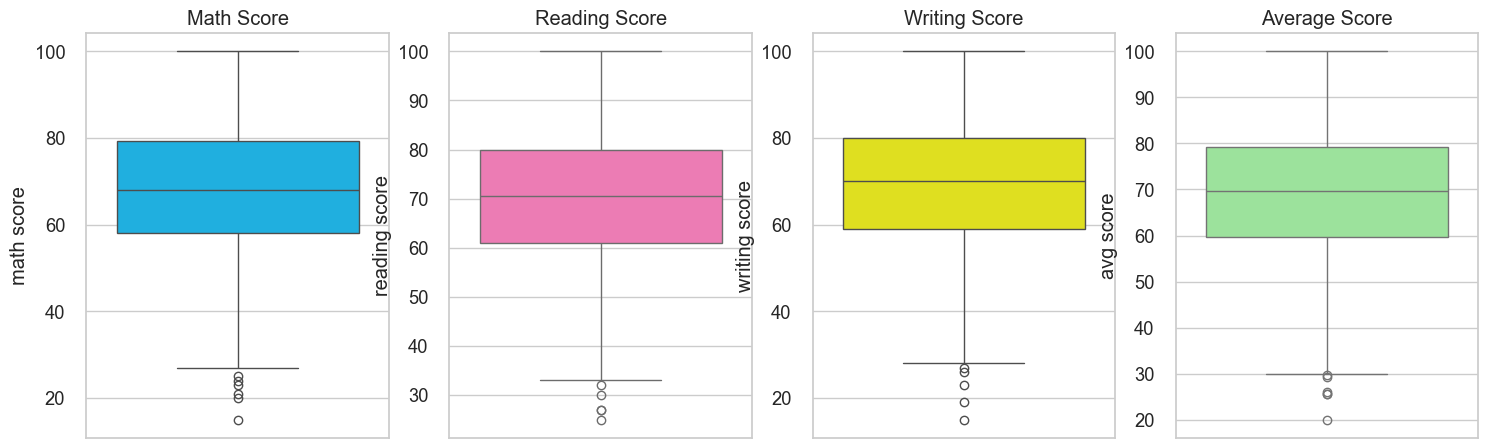

In [98]:
# Define modern color palettes
skyblue = "#00BFFF"
hotpink = "#FF69B4"
yellow = "#FFFF00"
lightgreen = "#90EE90"

# Create subplots with specified figure size
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

# Plot boxplots for each score column and set color using the defined palettes
sns.boxplot(df['math score'], color=skyblue, ax=axs[0])
sns.boxplot(df['reading score'], color=hotpink, ax=axs[1])
sns.boxplot(df['writing score'], color=yellow, ax=axs[2])
sns.boxplot(df['avg score'], color=lightgreen, ax=axs[3])

# Set titles for each subplot
axs[0].set_title('Math Score')
axs[1].set_title('Reading Score')
axs[2].set_title('Writing Score')
axs[3].set_title('Average Score')

# Show the plot
plt.show()

## 5. Model Training

### 5.1 Show Top 10 Records

In [99]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667
5,male,group C,some high school,standard,none,68,57,54,179,59.666667
6,female,group E,associate's degree,standard,none,82,83,80,245,81.666667
7,female,group B,some high school,standard,none,46,61,58,165,55.000000
8,male,group C,some high school,standard,none,80,75,73,228,76.000000
9,female,group C,bachelor's degree,standard,completed,57,69,77,203,67.666667


### 5.2 Preparing X and Y variables

In [100]:
X =df.drop(columns=['total score','avg score','math score'],axis=1)
print("Data Shape is :",X.shape)
X.head()

Data Shape is : (1000, 7)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,some college,standard,completed,70,78
1,male,group D,associate's degree,standard,none,93,87
2,female,group D,some college,free/reduced,none,76,77
3,male,group B,some college,free/reduced,none,70,63
4,female,group D,associate's degree,standard,none,85,86


In [101]:
Y = df['math score']
Y.head()

0    59
1    96
2    57
3    70
4    83
Name: math score, dtype: int64

### 5.3 Create Column Transformer with 3 types of transformers

In [102]:
# Create Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [103]:
X = preprocessor.fit_transform(X)

In [104]:
X.shape

(1000, 19)

### 5.4 Separate dataset into train and test

In [105]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### 5.5 Create an Evaluate Function to give all metrics after model Training

In [106]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### 5.6 Models Training

In [107]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

# Train model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) 

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4720
- Mean Absolute Error: 4.3891
- R2 Score: 0.8723
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9838
- Mean Absolute Error: 4.0735
- R2 Score: 0.8875


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.7208
- Mean Absolute Error: 5.4576
- R2 Score: 0.8074
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8090
- Mean Absolute Error: 5.3757
- R2 Score: 0.7900


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4721
- Mean Absolute Error: 4.3883
- R2 Score: 0.8723
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9874
- Mean Absolute Error: 4.0732
- R2 Score: 0.8873


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7199
- Mean Absolute Error: 4.5332
- R2 Score: 0.8605
-----------------------

### 5.7 Results

In [108]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.887488
2,Ridge,0.887328
7,CatBoosting Regressor,0.874470
5,Random Forest Regressor,0.851688
8,AdaBoost Regressor,0.827573
6,XGBRegressor,0.826102
3,K-Neighbors Regressor,0.810224
1,Lasso,0.789992
4,Decision Tree,0.743210


### 5.8 Linear Regression

In [109]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.75


### 5.9 Plot Y_pred and Y_test

#### Scatter Plot of Actual vs. Predicted

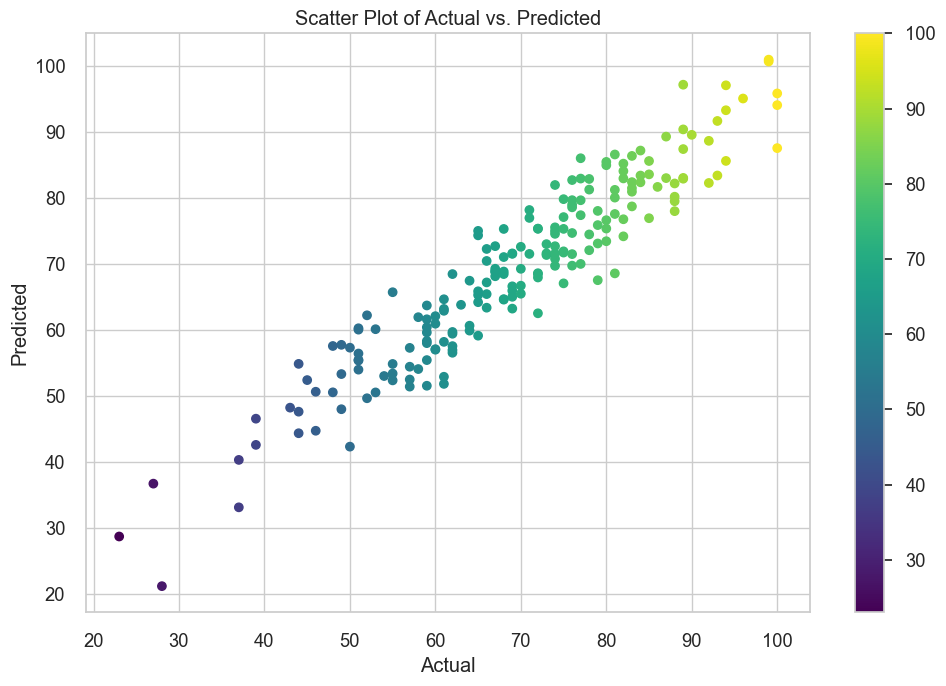

In [110]:
from matplotlib import cm
# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

#### Regression Plot of Actual vs. Predicted

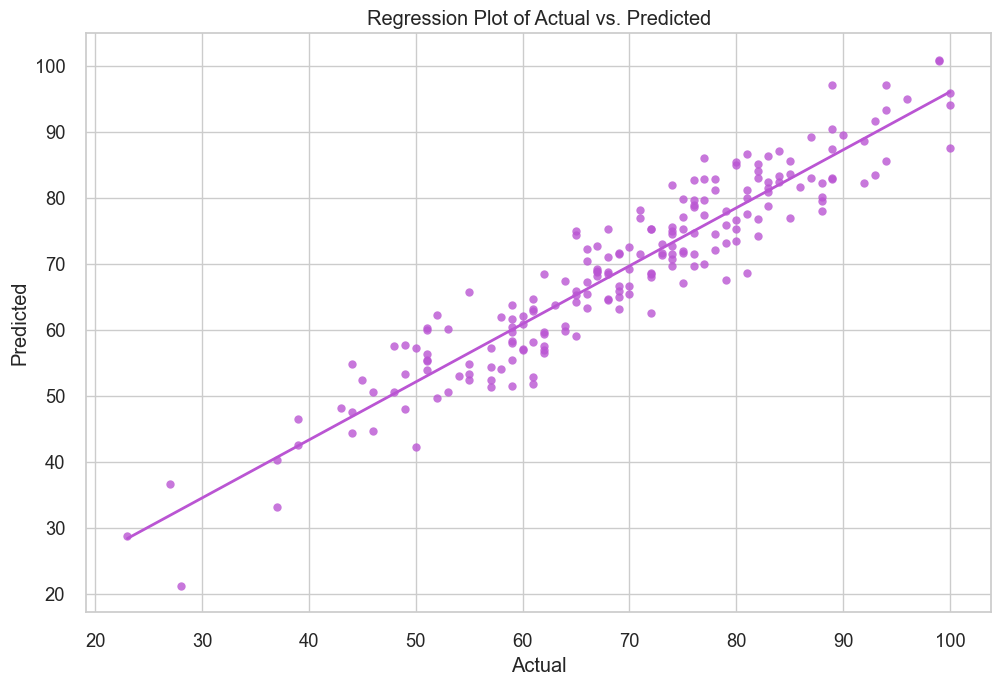

In [111]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=Y_test, y=Y_pred, ci=None, color='mediumorchid', line_kws={'lw':2})

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

### 5.10 Difference between Actual and Predicted Values

In [112]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,67,68.184361,-1.184361
737,78,81.306396,-3.306396
740,39,42.646078,-3.646078
660,70,69.310052,0.689948
411,90,89.600674,0.399326
...,...,...,...
408,100,87.589090,12.410910
332,66,70.499739,-4.499739
208,66,63.421025,2.578975
613,68,64.643819,3.356181
